# TUGAS KELOMPOK PCD 2

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

In [2]:
def read_grayscale_image(file_path):
    try:
        img = Image.open(file_path).convert('L')
        return list(img.getdata())
    except Exception as e:
        print(f"Error reading image {file_path}: {e}")
        return None

def image_to_2d(img_data, width):
    return [img_data[i:i+width] for i in range(0, len(img_data), width)]

def bitwise_not(image):
    return [[255 - pixel for pixel in row] for row in image]

def bitwise_and(image1, image2):
    return [[p1 & p2 for p1, p2 in zip(row1, row2)] for row1, row2 in zip(image1, image2)]

def bitwise_or(image1, image2):
    return [[p1 | p2 for p1, p2 in zip(row1, row2)] for row1, row2 in zip(image1, image2)]

def bitwise_xor(image1, image2):
    return [[p1 ^ p2 for p1, p2 in zip(row1, row2)] for row1, row2 in zip(image1, image2)]

def bitwise_xnor(image1, image2):
    xor_result = bitwise_xor(image1, image2)
    return bitwise_not(xor_result)

def bitwise_nor(image1, image2):
    or_result = bitwise_or(image1, image2)
    return bitwise_not(or_result)

def bitwise_nand(image1, image2):
    and_result = bitwise_and(image1, image2)
    return bitwise_not(and_result)

def bitwise_and_not(image1, image2):
    not_image2 = bitwise_not(image2)
    return bitwise_and(image1, not_image2)

def bitwise_and_not_reverse(image1, image2):
    not_image1 = bitwise_not(image1)
    return bitwise_and(image2, not_image1)

def add(image1, image2):
    return [[min(p1 + p2, 255) for p1, p2 in zip(row1, row2)] for row1, row2 in zip(image1, image2)]

def subtract(image1, image2):
    return [[max(p1 - p2, 0) for p1, p2 in zip(row1, row2)] for row1, row2 in zip(image1, image2)]

def multiply(image1, image2):
    return [[min(p1 * p2 // 255, 255) for p1, p2 in zip(row1, row2)] for row1, row2 in zip(image1, image2)]

def divide(image1, image2):
    return [[min(p1 // (p2 + 1), 255) for p1, p2 in zip(row1, row2)] for row1, row2 in zip(image1, image2)]

def logapelhm(image):
    return [[min(int(math.log1p(pixel) * 45), 255) for pixel in row] for row in image]

def exponential(image):
    return [[min(int(math.exp(pixel / 255) * 255), 255) for pixel in row] for row in image]

def square_root(image):
    return [[int(math.sqrt(pixel) * 16) for pixel in row] for row in image]

def sine(image):
    return [[int((math.sin(pixel / 255 * 2 * math.pi) + 1) * 127.5) for pixel in row] for row in image]

def cosine(image):
    return [[int((math.cos(pixel / 255 * 2 * math.pi) + 1) * 127.5) for pixel in row] for row in image]

def tangent(image):
    return [[min(int((math.tan(pixel / 255 * math.pi) + 1) * 127.5), 255) for pixel in row] for row in image]

def rotate_image(image, angle):
    return image.rotate(angle, expand=True)

def flip_horizontal(image):
    return image.transpose(Image.FLIP_LEFT_RIGHT)

def flip_vertical(image):
    return image.transpose(Image.FLIP_TOP_BOTTOM)

def scale_image(image, scale_factor):
    new_width = int(image.width * scale_factor)
    new_height = int(image.height * scale_factor)
    return image.resize((new_width, new_height))

def translate_image(image, x_offset, y_offset):
    translated = Image.new("L", (image.width, image.height))
    translated.paste(image, (x_offset, y_offset))
    return translated

def display():
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(display_images, titles), 1):
        plt.subplot(4, 4, i)
        if i <= 2:  
            plt.imshow(img)
        if i == 3:  
            plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        elif i <= 4:  
            plt.imshow(img, cmap='gray')
        else:  
            plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Image

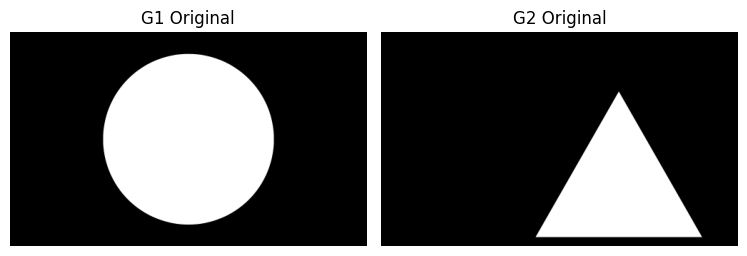

In [3]:
img1_pil = Image.open('./image/image1.png')
img2_pil = Image.open('./image/img4.png')

width, height = img2_pil.size

img1_pil = img1_pil.resize((width, height))
img2_pil = img2_pil.resize((width, height))

img1_gray = img1_pil.convert('L')
img2_gray = img2_pil.convert('L')

img1_data = list(img1_gray.getdata())
img2_data = list(img2_gray.getdata())

img1 = image_to_2d(img1_data, width)
img2 = image_to_2d(img2_data, width)

display_images = [
    np.array(img1_pil),        
    np.array(img2_pil),        
]

titles = [
    'G1 Original', 
    'G2 Original', 
]

display()

# Logic Operations 

In [4]:
not_img1 = bitwise_not(img1)
not_img2 = bitwise_not(img2)
and_img = bitwise_and(img1, img2)
or_img = bitwise_or(img1, img2)
and_not_img1 = bitwise_and_not(img1, img2)
and_not_img2 = bitwise_and_not_reverse(img1, img2)
xor_img = bitwise_xor(img1, img2)
xnor_img = bitwise_xnor(img1, img2)
nor_img = bitwise_nor(img1, img2)
nand_img = bitwise_nand(img1, img2)

# NOT

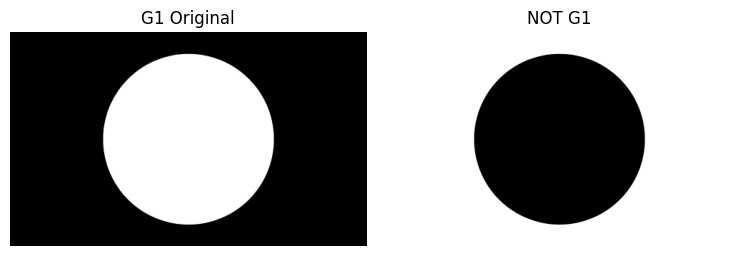

In [5]:
display_images = [
    np.array(img1_pil),        
    np.array(not_img1),                
]

titles = [
    'G1 Original', 
    'NOT G1', 
]

display()

# AND

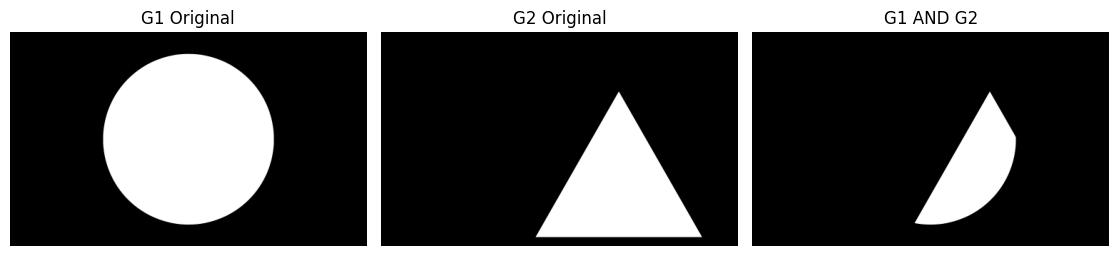

In [6]:

display_images = [
    np.array(img1_pil),        
    np.array(img2_pil),            
    np.array(and_img),              
]

titles = [
    'G1 Original', 
    'G2 Original', 
    'G1 AND G2', 
]

display()


# OR

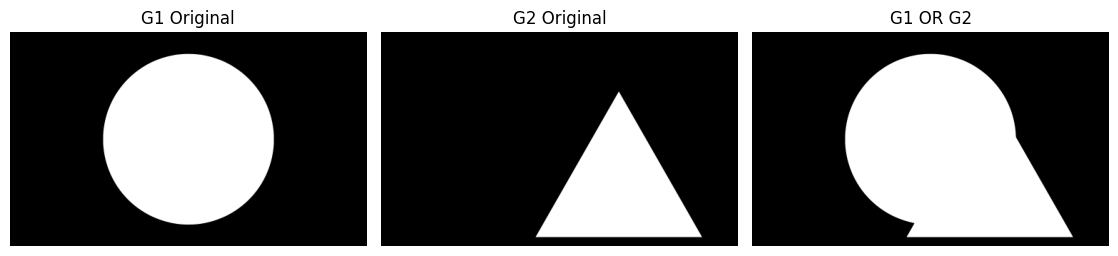

In [7]:

display_images = [
    np.array(img1_pil),        
    np.array(img2_pil),            
    np.array(or_img),              
]

titles = [
    'G1 Original', 
    'G2 Original', 
    'G1 OR G2', 
]

display()


# AND NOT

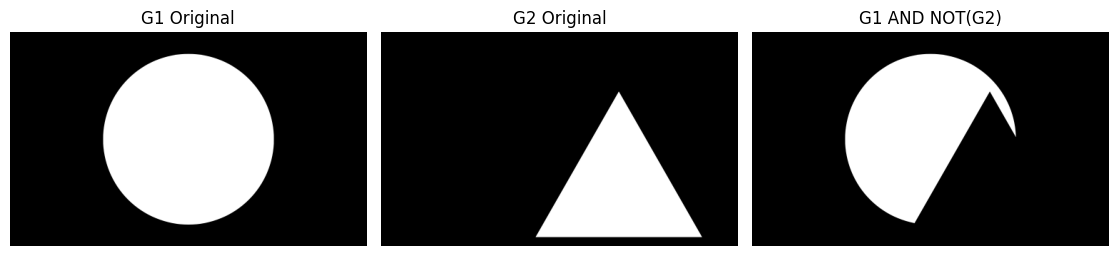

In [8]:

display_images = [
    np.array(img1_pil),        
    np.array(img2_pil),            
    np.array(and_not_img1),              
]

titles = [
    'G1 Original', 
    'G2 Original', 
    'G1 AND NOT(G2)', 
]

display()


# XOR

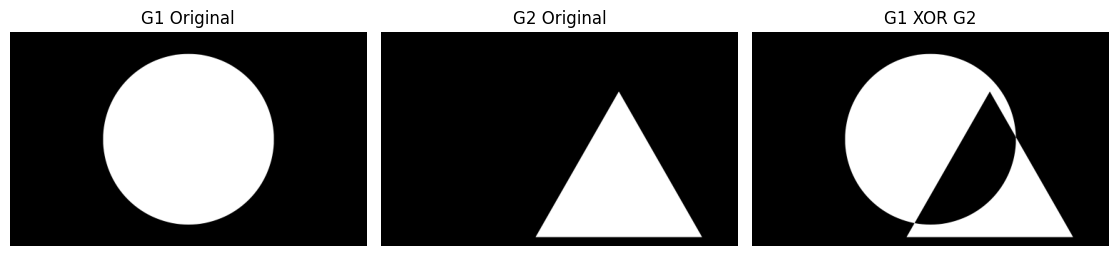

In [9]:

display_images = [
    np.array(img1_pil),        
    np.array(img2_pil),            
    np.array(xor_img),              
]

titles = [
    'G1 Original', 
    'G2 Original', 
    'G1 XOR G2', 
]

display()


# XNOR

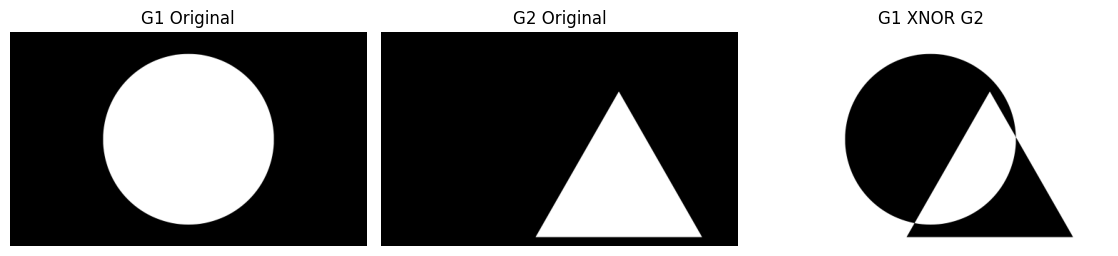

In [10]:

display_images = [
    np.array(img1_pil),        
    np.array(img2_pil),            
    np.array(xnor_img),              
]

titles = [
    'G1 Original', 
    'G2 Original', 
    'G1 XNOR G2', 
]

display()


# NOR

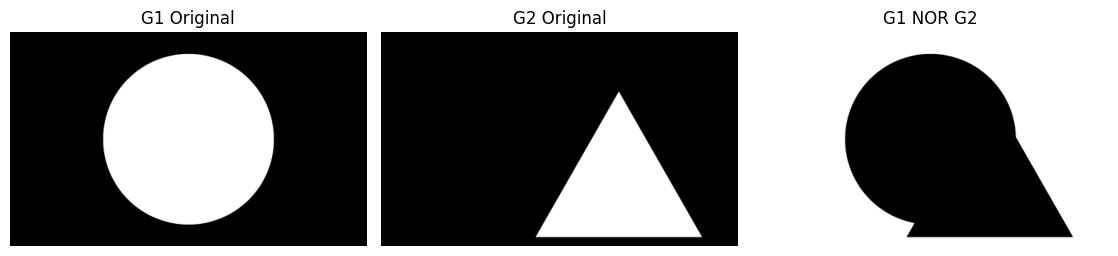

In [11]:

display_images = [
    np.array(img1_pil),        
    np.array(img2_pil),            
    np.array(nor_img),              
]

titles = [
    'G1 Original', 
    'G2 Original', 
    'G1 NOR G2', 
]

display()


# NAND

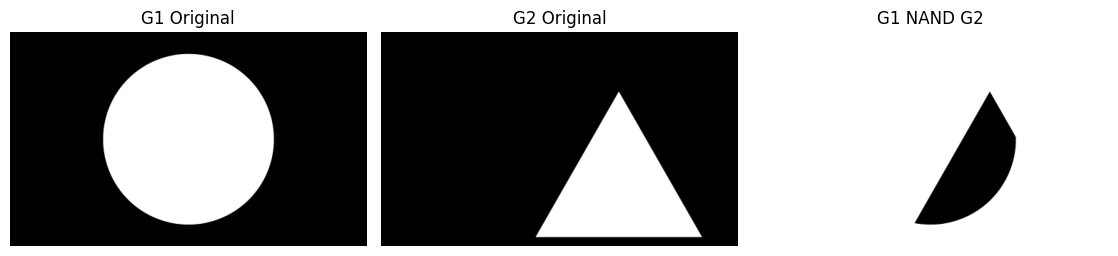

In [12]:

display_images = [
    np.array(img1_pil),        
    np.array(img2_pil),            
    np.array(nand_img),              
]

titles = [
    'G1 Original', 
    'G2 Original', 
    'G1 NAND G2', 
]

display()


# Arithmetic Operations

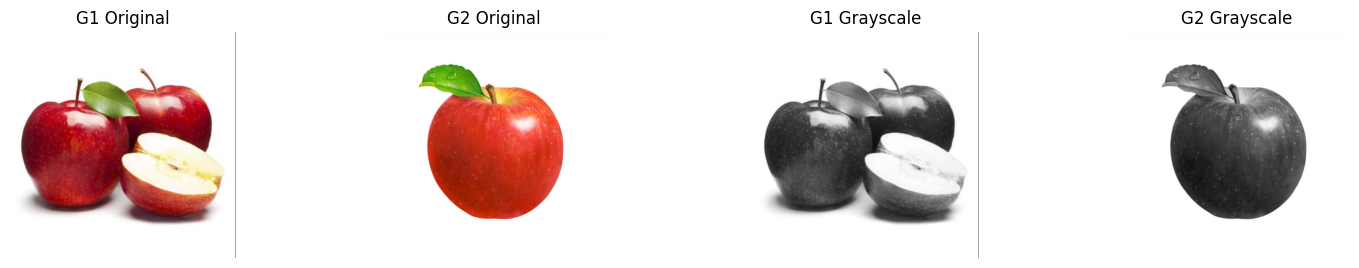

In [13]:
img1_pil_apel = Image.open('./image/2c6e6cfc-ad6d-49aa-9754-8e7b6f12cbc6.jpg')
img2_pil_apel = Image.open('./image/istockphoto-1345568023-612x612.jpg')

width, height = img2_pil_apel.size

img1_pil_apel = img1_pil_apel.resize((width, height))
img2_pil_apel = img2_pil_apel.resize((width, height))

img1_gray_apel = img1_pil_apel.convert('L')
img2_gray_apel = img2_pil_apel.convert('L')

img1_data_apel = list(img1_gray_apel.getdata())
img2_data = list(img2_gray_apel.getdata())

img1 = image_to_2d(img1_data_apel, width)
img2 = image_to_2d(img2_data, width)

display_images = [
    np.array(img1_pil_apel),        
    np.array(img2_pil_apel),  
    np.array(img1_gray_apel),      
    np.array(img2_gray_apel),           
]

titles = [
    'G1 Original', 
    'G2 Original', 
    'G1 Grayscale', 
    'G2 Grayscale', 
]

display()

In [14]:
add_img = add(img1, img2)
subtract_img = subtract(img1, img2) 
multiply_img = multiply(img1, img2)
divide_img = divide(img1, img2)
log_img = logapelhm(img2)
exp_img = exponential(img2)
sqrt_img = square_root(img2)
sin_img = sine(img2)
cos_img = cosine(img2)
tan_img = tangent(img2)

# ADD

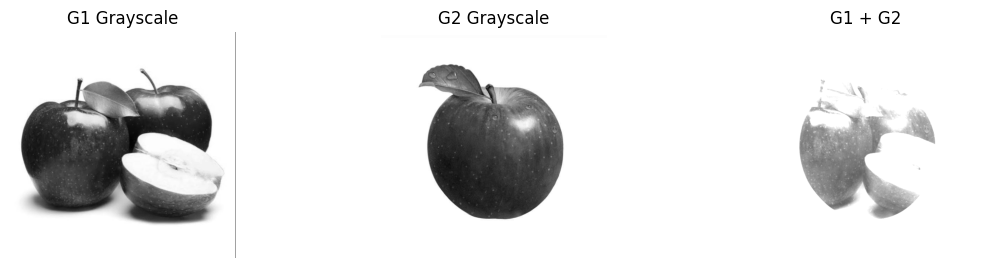

In [15]:

display_images = [
    np.array(img1_gray_apel),        
    np.array(img2_gray_apel),            
    np.array(add_img),              
]

titles = [
    'G1 Grayscale', 
    'G2 Grayscale', 
    'G1 + G2', 
]

display()


# SUB

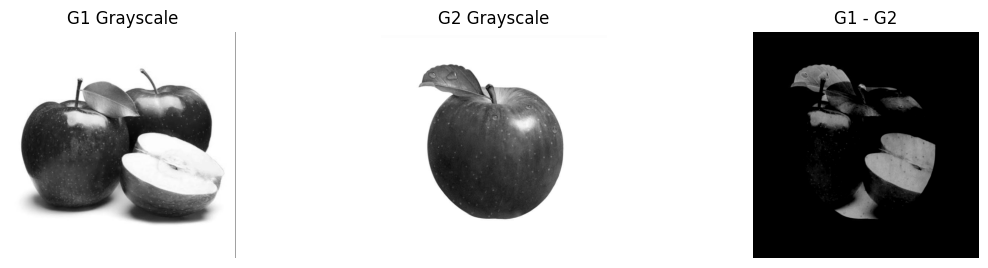

In [16]:

display_images = [
    np.array(img1_gray_apel),        
    np.array(img2_gray_apel),             
    np.array(subtract_img),              
]

titles = [
    'G1 Grayscale', 
    'G2 Grayscale', 
    'G1 - G2', 
]

display()


# MUL

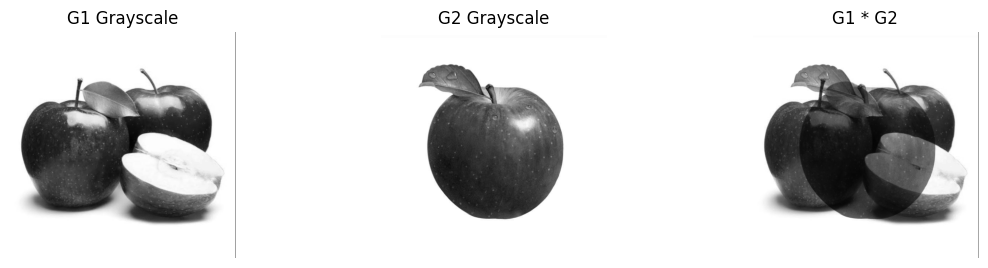

In [17]:

display_images = [
    np.array(img1_gray_apel),        
    np.array(img2_gray_apel), 
    np.array(multiply_img),              
]

titles = [
    'G1 Grayscale', 
    'G2 Grayscale', 
    'G1 * G2', 
]

display()


# DIV

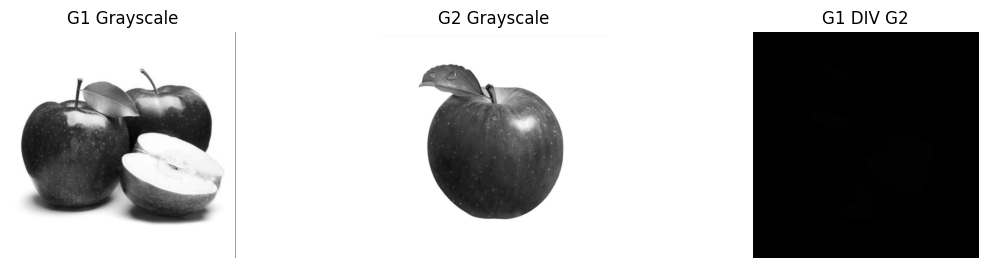

In [18]:

display_images = [
    np.array(img1_gray_apel),        
    np.array(img2_gray_apel),       
    np.array(divide_img),              
]

titles = [
    'G1 Grayscale', 
    'G2 Grayscale', 
    'G1 DIV G2', 
]

display()


# LOG

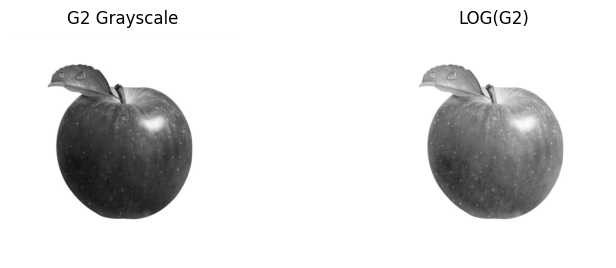

In [19]:

display_images = [
    np.array(img2_gray_apel),        
    np.array(log_img),              
]

titles = [
    'G2 Grayscale', 
    'LOG(G2)', 
]

display()


# EXP

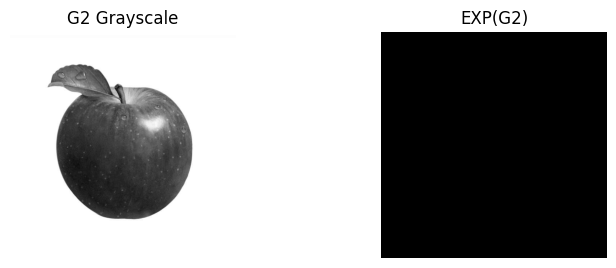

In [20]:

display_images = [
    np.array(img2_gray_apel),          
    np.array(exp_img),               
]

titles = [
    'G2 Grayscale',
    'EXP(G2)', 
]

display()


# SQRT

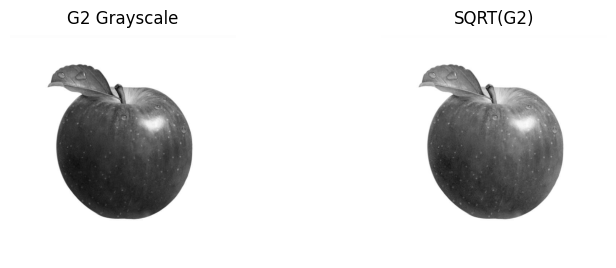

In [21]:

display_images = [
    np.array(img2_gray_apel),          
    np.array(sqrt_img),              
]

titles = [
    'G2 Grayscale',
    'SQRT(G2)', 
]

display()


# SIN

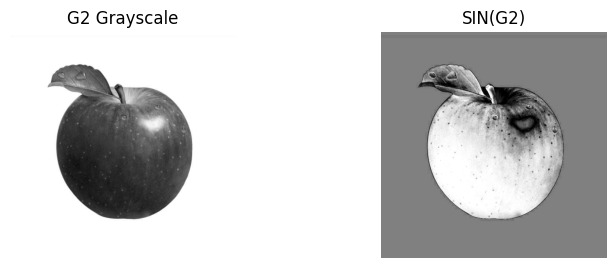

In [22]:

display_images = [
    np.array(img2_gray_apel),       
    np.array(sin_img),              
]

titles = [
    'G2 Grayscale',
    'SIN(G2)', 
]

display()


# COS

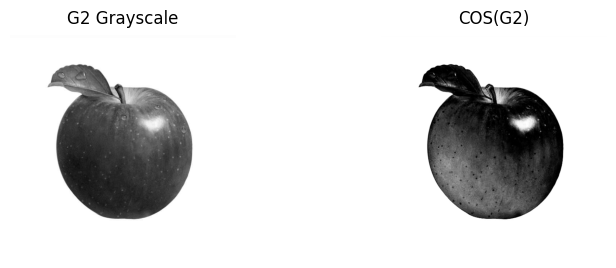

In [23]:

display_images = [
    np.array(img2_gray_apel),   
    np.array(cos_img),              
]

titles = [
    'G2 Grayscale',
    'COS(G2)', 
]

display()


# TAN

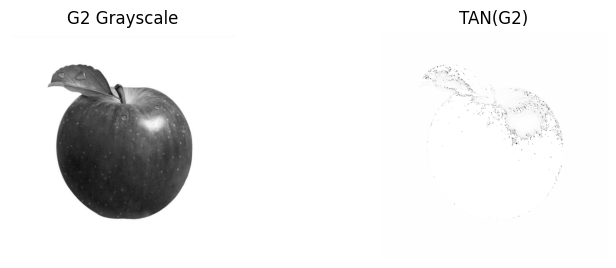

In [24]:

display_images = [
    np.array(img2_gray_apel),         
    np.array(tan_img),              
]

titles = [
    'G2 Grayscale', 
    'TAN(G2)', 
]

display()


# Geometric Transformation

In [25]:

img2_array = np.array(img2, dtype=np.uint8)
img2_transformed = Image.fromarray(img2_array)

rotated_45 = rotate_image(img2_transformed, 45)
flipped_h = flip_horizontal(img2_transformed)
flipped_v = flip_vertical(img2_transformed)
scaled_up = scale_image(img2_transformed, 1.5)
scaled_down = scale_image(img2_transformed, 0.2)
translated = translate_image(img2_transformed, 30, 30)


# Rotated 45°

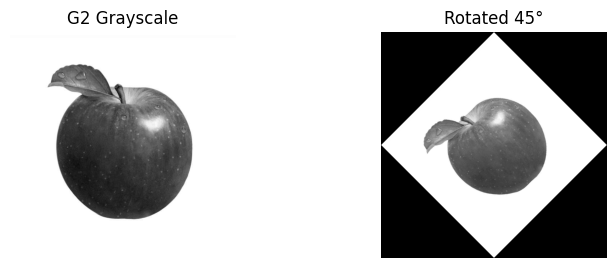

In [26]:

display_images = [
    np.array(img2_gray_apel),          
    np.array(rotated_45),              
]

titles = [
    'G2 Grayscale',
    'Rotated 45°', 
]

display()


# Horizontal Flip

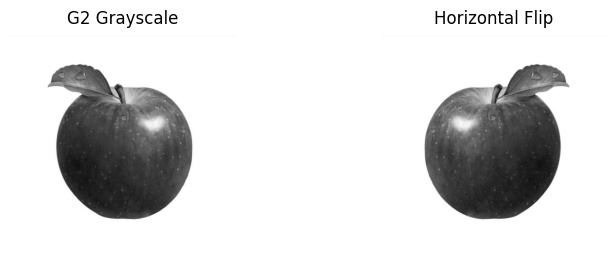

In [27]:

display_images = [
    np.array(img2_gray_apel),          
    np.array(flipped_h),              
]

titles = [
    'G2 Grayscale',
    'Horizontal Flip',  
]

display()


# Vertical Flip

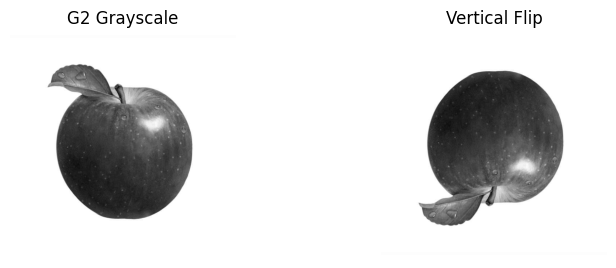

In [28]:

display_images = [
    np.array(img2_gray_apel),   
    np.array(flipped_v),              
]

titles = [
    'G2 Grayscale',
    'Vertical Flip', 
]

display()


# Scaled (0.2)

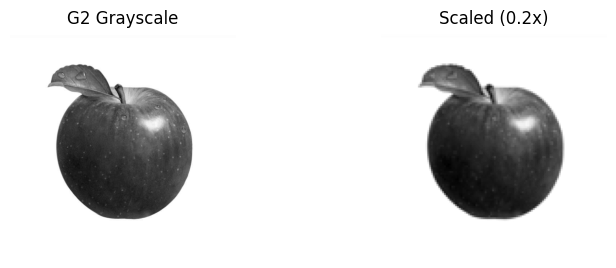

In [29]:

display_images = [
    np.array(img2_gray_apel),   
    np.array(scaled_down),               
]

titles = [
    'G2 Grayscale',
    'Scaled (0.2x)', 
]

display()


# Translated (30,30)

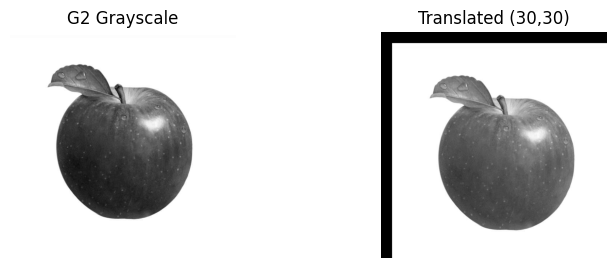

In [30]:

display_images = [
    np.array(img2_gray_apel),   
    np.array(translated),              
]

titles = [
    'G2 Grayscale',
    'Translated (30,30)', 
]

display()
